# **Questão 2**

## **Instruções**



*   Verifique as respostas antes de enviar, veja se elas fazem sentido!
*   Lembre-se de salvar frequentemente!
*   Não envie apenas o notebook, envie a pasta inteira com as imagens!

# **Formulário**

## **Instalar bibliotecas (caso ainda não tenham sido instaladas)**
```
pip install numpy
pip install matplotlib
pip install sounddevice
pip install moviepy
pip install scipy
```

## **Importações**
```
import moviepy.editor as mpe
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import sounddevice as sd
from PIL import Image
```

## **Códigos**
```
# Manipulação de imagens
img = Image.open('nome.extensão')
img = np.array(Image.open('nome.extensão'))
img = img[:, :, :3]
img_pil = Image.fromarray(img_np)
img.save('nome.png')
Image.fromarray(img).save('nome_arquivo.extensao')

#Manipulação de aúdio
fs, data = wavfile.read("nome.extensão")
sd.play(data, fs)
wavfile.write("nome.extensão", fs, parte)

audio = np.zeros(shape = (fs * t, 2), dtype = np.float32)

for i in range(fs * t):
    audio[i, 0] = np.sin(2 * np.pi * f1 * i / fs)
    audio[i, 1] = np.sin(2 * np.pi * f2 * i / fs)

#Manipulação de vídeo
video = mpe.VideoFileClip("nome.extensão")
video.ipython_display(width=480)
frame = nome.get_frame(t)
frame = nome.get_frame(num/video.fps)
part = video.subclip(3,5)
parts = mpe.concatenate_videoclips([part_1, part_2, part_3])

def invert(frame): #Exemplo de uma função para alterar todos os frames
    return (255-frame)
video_inverted = video.fl_image(invert)

# Histograma
plt.bar(range(256), histogram_r, color='red')
plt.bar(range(256), histogram_g, color='green')
plt.bar(range(256), histogram_b, color='blue')

# Detecção de bordas
abs_tg_eixo = np.abs(np.diff(img, axis=eixo, append=0))
```

## **Fórmulas**

### **Grayscale**

Lightness: $\frac{max(R,G,B)+min(R,G,B)}{2}$

Average: $\frac{R+G+B}{3}$

Luminosity: $0.2126 \cdot R + 0.7152 \cdot G + 0.0722 \cdot B$


### **Cor**

$$\begin{bmatrix}
    R \\ G \\ B
\end{bmatrix} = \begin{bmatrix}
    255 \\ 255 \\ 255
\end{bmatrix} - \begin{bmatrix}
    C \\ M \\ Y
\end{bmatrix}$$

**a)** Carregue o áudio **Roundabout.wav** presente pasta e reproduza-o.

In [45]:
import moviepy.editor as mpe
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import sounddevice as sd
from PIL import Image

fs, data = wavfile.read("Roundabout.WAV")
sd.play(data, fs)

**b)** Divida o áudio da questão anterior em duas partes. A primeira de 10 até 15 segundos e a segunda de 40 a 45 segundos. Reproduza as duas partes.

In [46]:
parte1 = data[fs * 10:fs * 15, :]
parte2 = data[fs * 40:fs * 45, :]

sd.play(parte1, fs)
sd.play(parte2, fs)

**c)** Reproduza a segunda parte 50% mais aguda.

In [47]:
sd.play(parte2, fs*1.5)

**d)** Exiba os canais de som da primeira parte do áudio obtido na questão **B**.

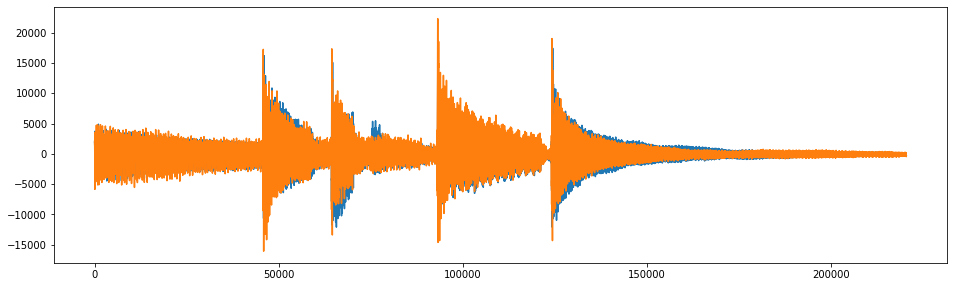

In [48]:
plt.figure(figsize=(16, 16))
plt.subplot(3, 1, 1)
plt.plot(parte1)

**e)** Abra o vídeo **"bigbuckbunny.mp4"** que se encontra na pasta e mostre-o na tela com widith = 480.

In [49]:
video = mpe.VideoFileClip("bigbuckbunny.mp4")
video.ipython_display(width=480)

t:  73%|█████████████████████████████████████████████████▌                  | 97/133 [04:23<01:42,  2.85s/it, now=None]

Moviepy - Building video __temp__.mp4.
MoviePy - Writing audio in __temp__TEMP_MPY_wvf_snd.mp3



t:  73%|█████████████████████████████████████████████████▌                  | 97/133 [04:25<01:42,  2.85s/it, now=None]

MoviePy - Done.
Moviepy - Writing video __temp__.mp4




t:  73%|█████████████████████████████████████████████████▌                  | 97/133 [04:28<01:42,  2.85s/it, now=None]

Moviepy - Done !
Moviepy - video ready __temp__.mp4


**f)** Crie uma função para espelhar os frames de um vídeo no eixo X.

In [53]:
def mirror(frame):
    
    l, c, p = video.get_frame(0).shape
    
    out = np.zeros(shape=(video.h, video.w, 3), dtype=np.float32)

    for i in range(l):
        for j in range(c):
            new_y = i
            new_x = -j
                
            out[new_y, new_x] = frame[i, j]    
            
    return (out)

#video_inverted = video.fl_image(mirror)

**g)** Particione o vídeo da questão **E** em três partes. A primeira de 0 a 2 segundos, a segunda de 2 a 4 segundos e a terceira de 4 segundos até o final.

In [54]:
part1 = video.subclip(0, 2) # 0 a 2 segundos
part2 = video.subclip(2, 4) # 2 a 4 segundos
part3 = video.subclip(4,) # 4 até o final

**h)** Concatene as três partes da questão anterior em um uníco vídeo da seguinte forma: a primeira parte deve ser covertida para CMY e na segunda deve ser aplicada a função criada na questão **F**. Não deve ser aplicada nenhuma função na terceira parte. Exiba o resultado obtido com width = 480.


In [56]:
def invert(frame):
    return (255-frame)

part1_CMY = part1.fl_image(invert)

part2_mirror = part2.fl_image(mirror)

parts = mpe.concatenate_videoclips([part1_CMY, part2_mirror, part3])
parts.write_videofile('video_parts.mp4')
parts.ipython_display(width=480)

t:  73%|█████████████████████████████████████████████████▌                  | 97/133 [14:31<01:42,  2.85s/it, now=None]

Moviepy - Building video video_parts.mp4.
MoviePy - Writing audio in video_partsTEMP_MPY_wvf_snd.mp3



t:  73%|█████████████████████████████████████████████████▌                  | 97/133 [14:32<01:42,  2.85s/it, now=None]

MoviePy - Done.
Moviepy - Writing video video_parts.mp4




t:  73%|█████████████████████████████████████████████████▌                  | 97/133 [16:47<01:42,  2.85s/it, now=None]

Moviepy - Done !
Moviepy - video ready video_parts.mp4
Moviepy - Building video __temp__.mp4.
MoviePy - Writing audio in __temp__TEMP_MPY_wvf_snd.mp3



t:  73%|█████████████████████████████████████████████████▌                  | 97/133 [16:49<01:42,  2.85s/it, now=None]

MoviePy - Done.
Moviepy - Writing video __temp__.mp4




t:  73%|█████████████████████████████████████████████████▌                  | 97/133 [19:11<01:42,  2.85s/it, now=None]

Moviepy - Done !
Moviepy - video ready __temp__.mp4
